In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv('finalSentimentdata2.csv')
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [4]:
df['sentiment'].unique()

array(['sad', 'joy', 'fear', 'anger'], dtype=object)

In [5]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = nltk.tokenize.word_tokenize(text)
    
    
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    
    cleaned_text = ' '.join(words)
    
    return cleaned_text


In [6]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [7]:
df['cleaned_text'][1]

'could spent cutie vc n g h coast crossing republik'

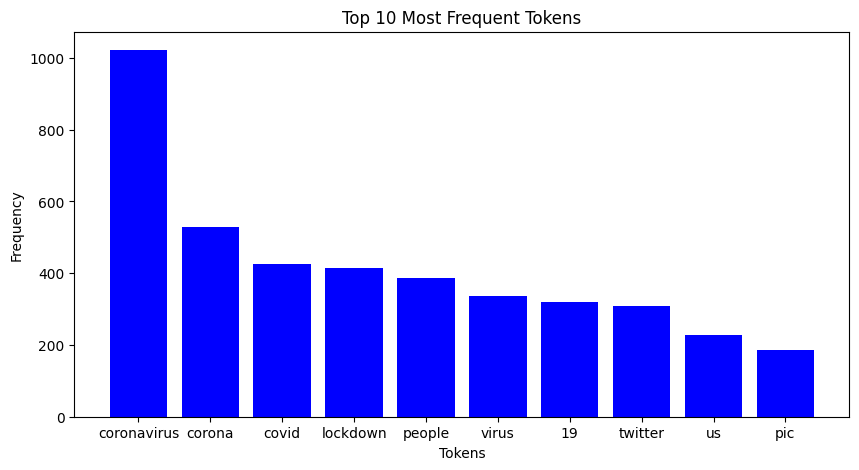

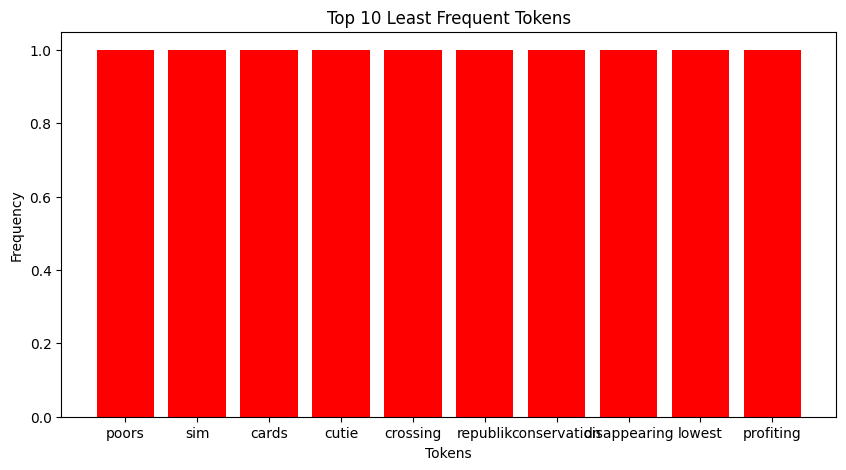

In [8]:
from collections import Counter

word2count = {}

for text in df['cleaned_text']:
    words = nltk.word_tokenize(text)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

word_count_df = pd.DataFrame(word2count.items(), columns=['word', 'count'])

top_10_most_frequent = word_count_df.nlargest(10, 'count')
top_10_least_frequent = word_count_df.nsmallest(10, 'count')

plt.figure(figsize=(10, 5))
plt.bar(top_10_most_frequent['word'], top_10_most_frequent['count'], color='blue')
plt.title('Top 10 Most Frequent Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(top_10_least_frequent['word'], top_10_least_frequent['count'], color='red')
plt.title('Top 10 Least Frequent Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()


In [9]:
from collections import defaultdict
def build_bow(df): 
    bow = defaultdict(int) 
    for text in df['cleaned_text']:
        words = nltk.word_tokenize(text)
        for word in words: 
            bow[word] += 1 
    return bow  

bow = build_bow(df)

In [10]:
vocab = list(word2count.keys()) 
def text_to_binary_vector(text, vocab): 
    words = word_tokenize(text) 
    return [1 if word in words else 0 for word in vocab]

In [11]:
X = pd.DataFrame([text_to_binary_vector(text, vocab) for text in df['cleaned_text']], columns=vocab)
X['sentiment'] = df['sentiment']

In [12]:
X.head()

,agree,poor,india,treated,badly,poors,seek,living,singapore,like,...,cease,issa,inshaallah,mir,mushtaq,superintendent,gns,barrier,remedy,sentiment
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,sad
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,joy
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,joy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sad
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sad


In [13]:
sorted_words = sorted(word2count.items() , key = lambda x:x[1] , reverse = True)
lengths = list(range(100,3100,100))


def create_feature_vectors(length):
    selected_words = [word for word, count in sorted_words[:length]]
    def text_to_binary_vector(text):
        words = word_tokenize(text)
        return [1 if word in words else 0 for word in selected_words]
    return pd.DataFrame([text_to_binary_vector(text) for text in df['cleaned_text']], columns=selected_words)

feature_vectors = {length: create_feature_vectors(length) for length in lengths}
feature_vectors[100]

,coronavirus,corona,covid,lockdown,people,virus,19,twitter,us,pic,...,since,fear,come,said,best,every,lives,5,god,state
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3086,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3087,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3088,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Define the Naive Bayes classifier with Laplace smoothing
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.word_probs = {}
    
    def fit(self, X, y, alpha=1.0):
        num_samples, num_features = X.shape
        self.class_priors = {label: np.mean(y == label) for label in np.unique(y)}
        self.word_probs = {label: np.zeros(num_features) for label in np.unique(y)}
        
        for label in self.class_priors:
            X_label = X[y == label]
            self.word_probs[label] = (X_label.sum(axis=0) + alpha) / (X_label.sum().sum() + alpha * num_features)
            wrong = (X[y != label])
            print(wrong)
    
    def predict(self, X):
        predictions = []
        for i, x in X.iterrows():
            label_probs = {}
            for label in self.class_priors:
                label_prob = np.log(self.class_priors[label])
                word_probs = np.log(self.word_probs[label])
                label_probs[label] = label_prob + np.sum(word_probs * x)
            predictions.append(max(label_probs, key=label_probs.get))
            
        return np.array(predictions)


In [15]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import cross_val_score,KFold
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for length in lengths:
    X = feature_vectors[length]
    y = df['sentiment']
    
    acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = NaiveBayes()
        model.fit(X_train, y_train, alpha=1.0)
        y_pred = model.predict(X_test)
        
        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred,average=None ))
        rec_scores.append(recall_score(y_test, y_pred,average=None ))
        f1_scores.append(f1_score(y_test, y_pred,average=None ))
    
    results.append((length, np.mean(acc_scores), np.mean(prec_scores), np.mean(rec_scores), np.mean(f1_scores)))

results_df = pd.DataFrame(results, columns=['Feature Vector Length', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df


,Feature Vector Length,Accuracy,Precision,Recall,F1 Score
0,100,0.526861,0.531455,0.529232,0.526978
1,200,0.573463,0.576758,0.576040,0.574965
2,300,0.600971,0.604314,0.603068,0.602379
3,400,0.610680,0.613564,0.613181,0.611974
4,500,0.610356,0.613276,0.612369,0.611762
5,600,0.620712,0.623115,0.622327,0.621988
6,700,0.629126,0.631794,0.630782,0.630466
7,800,0.636893,0.639062,0.638860,0.638136
8,900,0.641748,0.644517,0.643864,0.643378
9,1000,0.642718,0.645051,0.644509,0.644175


In [16]:
# not the part of code just for being sure about reults


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=3000)  # Adjust max_features to 3000 to match the range

# Transform the text data into a bag of words
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# Initialize Naive Bayes classifier
model = MultinomialNB(alpha=1.0)  # Laplace smoothing

# Calculate cross-validated metrics
cv_results = {
    "Feature Vector Length": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for length in lengths:
    vectorizer = CountVectorizer(max_features=length)
    X = vectorizer.fit_transform(df['cleaned_text']).toarray()
    
    acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    prec_scores = cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
    rec_scores = cross_val_score(model, X, y, cv=5, scoring='recall_weighted')
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    
    cv_results["Feature Vector Length"].append(length)
    cv_results["Accuracy"].append(np.mean(acc_scores))
    cv_results["Precision"].append(np.mean(prec_scores))
    cv_results["Recall"].append(np.mean(rec_scores))
    cv_results["F1 Score"].append(np.mean(f1_scores))

# Convert to DataFrame
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)


    Feature Vector Length  Accuracy  Precision    Recall  F1 Score
0                     100  0.544984   0.548359  0.544984  0.544879
1                     200  0.582524   0.585936  0.582524  0.582875
2                     300  0.597087   0.600819  0.597087  0.597756
3                     400  0.604207   0.607336  0.604207  0.604546
4                     500  0.609061   0.612917  0.609061  0.609572
5                     600  0.619094   0.622113  0.619094  0.619318
6                     700  0.619741   0.623280  0.619741  0.620332
7                     800  0.624595   0.627278  0.624595  0.624982
8                     900  0.625566   0.627536  0.625566  0.625763
9                    1000  0.634628   0.636139  0.634628  0.634767
10                   1100  0.641100   0.643119  0.641100  0.641299
11                   1200  0.642395   0.644191  0.642395  0.642552
12                   1300  0.645631   0.647008  0.645631  0.645689
13                   1400  0.648867   0.650283  0.648867  0.64

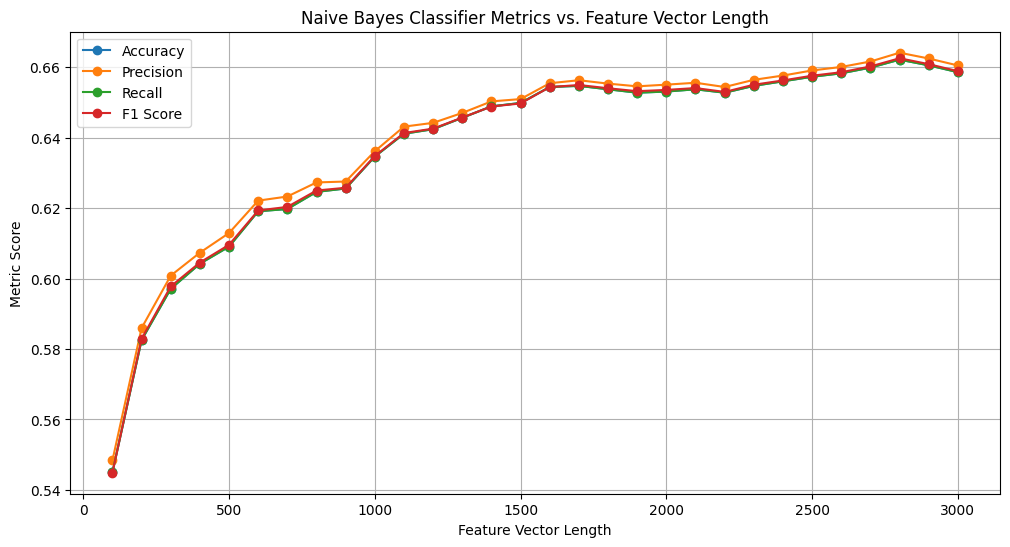

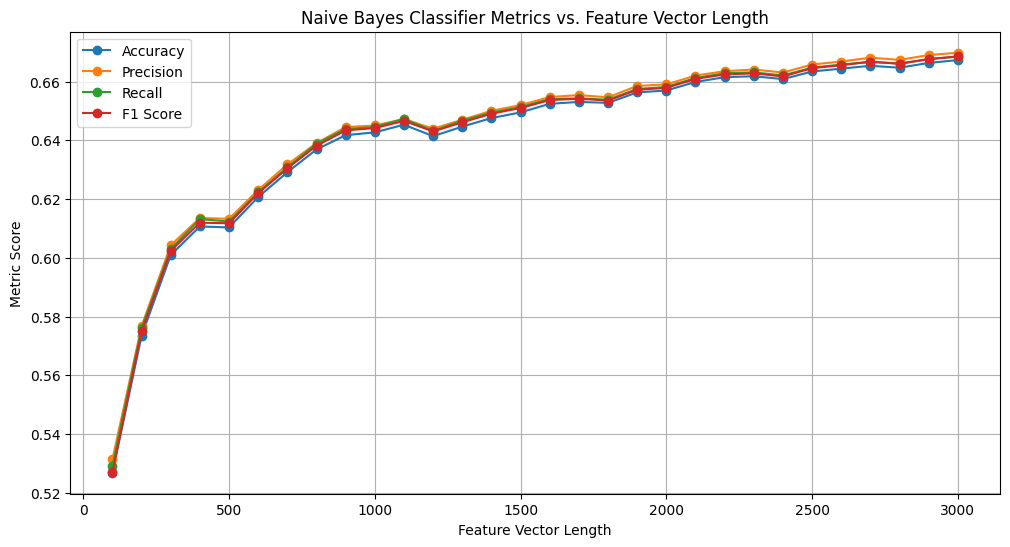

In [17]:
# Plot the metrics with using library
plt.figure(figsize=(12, 6))
plt.plot(cv_results_df['Feature Vector Length'], cv_results_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(cv_results_df['Feature Vector Length'], cv_results_df['Precision'], label='Precision', marker='o')
plt.plot(cv_results_df['Feature Vector Length'], cv_results_df['Recall'], label='Recall', marker='o')
plt.plot(cv_results_df['Feature Vector Length'], cv_results_df['F1 Score'], label='F1 Score', marker='o')
plt.title('Naive Bayes Classifier Metrics vs. Feature Vector Length')
plt.xlabel('Feature Vector Length')
plt.ylabel('Metric Score')
plt.legend()
plt.grid(True)
plt.show()
# Plot the metrics without using library
plt.figure(figsize=(12, 6))
plt.plot(results_df['Feature Vector Length'], results_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['Feature Vector Length'], results_df['Precision'], label='Precision', marker='o')
plt.plot(results_df['Feature Vector Length'], results_df['Recall'], label='Recall', marker='o')
plt.plot(results_df['Feature Vector Length'], results_df['F1 Score'], label='F1 Score', marker='o')
plt.title('Naive Bayes Classifier Metrics vs. Feature Vector Length')
plt.xlabel('Feature Vector Length')
plt.ylabel('Metric Score')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Train and evaluate the Naive Bayes classifier with cross-validation
results_train = []
results_valid = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for length in lengths:
    X = feature_vectors[length]
    y = df['sentiment']
    
    acc_scores_train, prec_scores_train, rec_scores_train, f1_scores_train = [], [], [], []
    acc_scores_valid, prec_scores_valid, rec_scores_valid, f1_scores_valid = [], [], [], []
    
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
        
        model = NaiveBayes()
        model.fit(X_train, y_train, alpha=1.0)
        
        # Evaluate on training set
        y_pred_train = model.predict(X_train)
        acc_scores_train.append(accuracy_score(y_train, y_pred_train))
        prec_scores_train.append(precision_score(y_train, y_pred_train, average=None))
        rec_scores_train.append(recall_score(y_train, y_pred_train,average=None))
        f1_scores_train.append(f1_score(y_train, y_pred_train,average=None))
        
        # Evaluate on validation set
        y_pred_valid = model.predict(X_valid)
        acc_scores_valid.append(accuracy_score(y_valid, y_pred_valid))
        prec_scores_valid.append(precision_score(y_valid, y_pred_valid,average=None))
        rec_scores_valid.append(recall_score(y_valid, y_pred_valid, average=None))
        f1_scores_valid.append(f1_score(y_valid, y_pred_valid, average=None))
    
    results_train.append((length, np.mean(acc_scores_train), np.mean(prec_scores_train), np.mean(rec_scores_train), np.mean(f1_scores_train)))
    results_valid.append((length, np.mean(acc_scores_valid), np.mean(prec_scores_valid), np.mean(rec_scores_valid), np.mean(f1_scores_valid)))

# Display the results
results_train_df = pd.DataFrame(results_train, columns=['Feature Vector Length', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_valid_df = pd.DataFrame(results_valid, columns=['Feature Vector Length', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("Training Set Results:\n", results_train_df)
print("Validation Set Results:\n", results_valid_df)


Training Set Results:
     Feature Vector Length  Accuracy  Precision    Recall  F1 Score
0                     100  0.578883   0.582815  0.579744  0.579271
1                     200  0.639806   0.641769  0.641005  0.640819
2                     300  0.682201   0.683518  0.683487  0.683015
3                     400  0.706149   0.707437  0.707379  0.706858
4                     500  0.728074   0.729175  0.729197  0.728796
5                     600  0.745307   0.746564  0.746314  0.746051
6                     700  0.761570   0.762747  0.762647  0.762195
7                     800  0.775728   0.776634  0.776706  0.776238
8                     900  0.786003   0.786816  0.786989  0.786501
9                    1000  0.797087   0.797855  0.798084  0.797596
10                   1100  0.806796   0.807664  0.807758  0.807333
11                   1200  0.817718   0.818542  0.818603  0.818269
12                   1300  0.825728   0.826494  0.826600  0.826235
13                   1400  0.834709   0

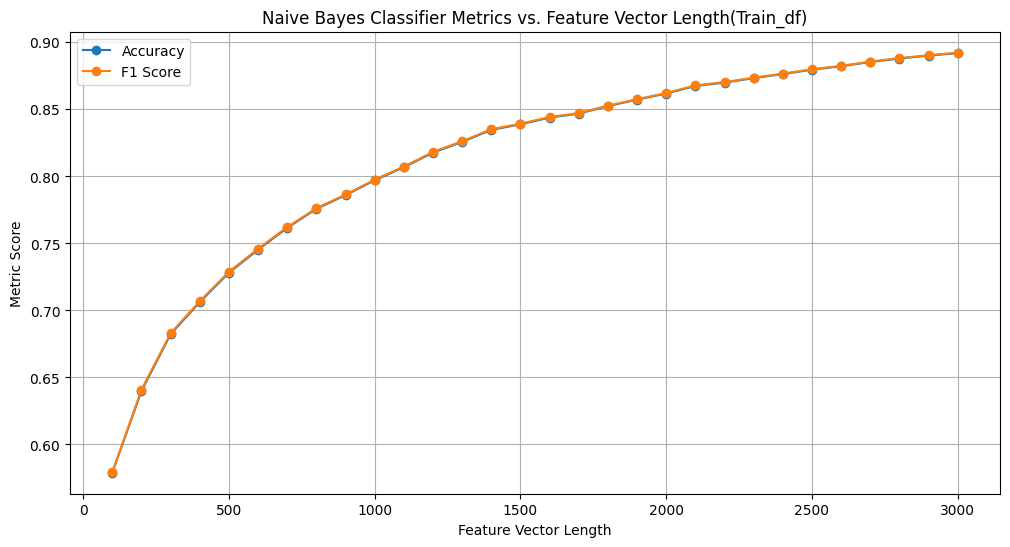

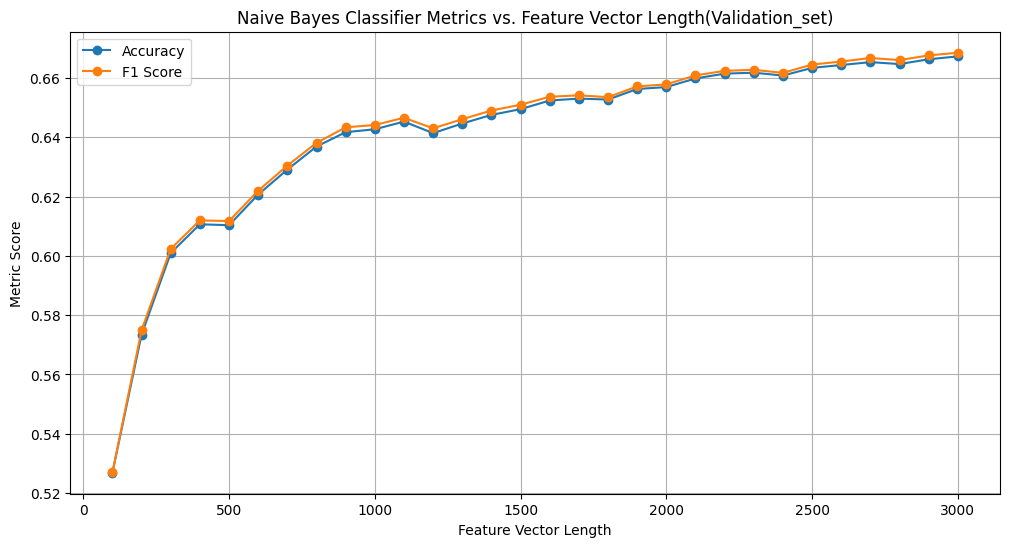

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(results_train_df['Feature Vector Length'], results_train_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_train_df['Feature Vector Length'], results_train_df['F1 Score'], label='F1 Score', marker='o')
plt.title('Naive Bayes Classifier Metrics vs. Feature Vector Length(Train_df)')
plt.xlabel('Feature Vector Length')
plt.ylabel('Metric Score')
plt.legend()
plt.grid(True)
plt.show()







plt.figure(figsize=(12, 6))
plt.plot(results_valid_df['Feature Vector Length'], results_valid_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_valid_df['Feature Vector Length'], results_valid_df['F1 Score'], label='F1 Score', marker='o')
plt.title('Naive Bayes Classifier Metrics vs. Feature Vector Length(Validation_set)')
plt.xlabel('Feature Vector Length')
plt.ylabel('Metric Score')
plt.legend()
plt.grid(True)
plt.show()
